In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [3]:
#initial_path = '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/CINGULATE_left/2024-07-16/16-58-04_1/ukb_random_epoch80_embeddings'
#initial_path = '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/CINGULATE_right//09-52-22_75/ukb_random_epoch80_embeddings'
#initial_path = '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_2/ukb_random_epoch120_embeddings'
initial_path = '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_left/14-56-46_3/ukb_random_epoch110_embeddings'
#initial_path = '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/STs_left/11-43-38_0/ukb_random_embeddings'
#initial_path = '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/ORBITAL_left/20-56-02_1/ukb_random_embeddings'
#initial_path = '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/ORBITAL_right/15-53-41_191/ukb_random_epoch80_embeddings'

embeddings_UKB = pd.read_csv(f'{initial_path}/full_embeddings.csv', index_col=0)

In [4]:
embeddings_UKB.describe()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
count,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,...,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000
mean,-19.045804,9.761000,-1.483004,0.470657,-50.960300,0.414652,18.726680,3.313622,1.421037,0.357679,...,18.115549,163.970466,8.032262,18.994714,4.700408,-18.113255,-6.104151,7.289714,15.345280,-11.424120
std,30.845306,30.519218,33.415367,31.977757,38.819492,34.177288,35.050428,21.604793,32.678285,38.204675,...,37.385839,33.518447,19.153328,38.258818,23.472834,25.484615,35.999846,34.828468,33.571884,32.161573
min,-116.310680,-87.204025,-105.091020,-103.301980,-176.087020,-112.181570,-78.033810,-68.389496,-111.095880,-114.671040,...,-100.853264,56.749800,-59.642124,-100.658295,-73.951096,-114.414800,-118.939910,-101.856995,-92.951195,-112.092186
25%,-40.542805,-11.262941,-24.540426,-21.698608,-77.825980,-23.518288,-6.458370,-11.641115,-21.245684,-27.558517,...,-9.373062,140.014950,-5.133872,-7.766741,-11.566816,-35.714790,-31.499287,-17.352232,-8.325783,-33.967060
50%,-18.427368,9.920880,-0.790948,0.423177,-51.002014,0.908623,18.138844,3.848205,1.691446,-1.007976,...,18.109821,163.996120,8.060984,18.670559,4.785940,-17.899843,-5.375310,6.369841,14.741310,-10.919190
75%,3.356491,31.397234,22.093729,23.095734,-24.233168,24.683847,43.224690,18.810432,24.717240,26.724218,...,45.322903,187.764160,21.079490,45.624250,20.983068,-0.180966,19.934988,30.990559,38.713050,11.767675
max,74.696625,117.477990,109.822040,115.635040,79.315080,102.039314,149.742650,71.786920,106.416610,129.078110,...,127.960810,269.949620,72.956770,154.157330,88.481320,62.402110,110.323340,114.283950,133.791020,88.354530


In [5]:
embeddings_UKB.std(axis=0).min()

15.973290411598416

In [6]:
embeddings_UKB.std(axis=0).max()

45.18025008111774

In [7]:
#scaler = StandardScaler()
#scaler.fit(embeddings_UKB)
#scl_bdd_ukb = scaler.transform(embeddings_UKB)
#scl_bdd_ukb.shape

In [8]:
n_components=20

pca = PCA(n_components=n_components)
pca.fit(embeddings_UKB)
print(pca.explained_variance_ratio_)

[0.13304836 0.11843259 0.10739095 0.09781631 0.09307714 0.07915643
 0.07246385 0.063007   0.05684976 0.0476355  0.039824   0.03134284
 0.02242557 0.01475662 0.00747791 0.00424546 0.00235613 0.00152173
 0.00142712 0.00098706]


In [140]:
(np.cumsum(pca.explained_variance_ratio_) < 0.99).sum()

16

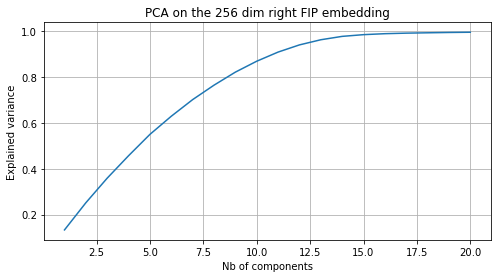

In [141]:
plt.figure(figsize=(8,4))
plt.plot(range(1,n_components+1,1), np.cumsum(pca.explained_variance_ratio_))
plt.grid(visible=True)
plt.xlabel('Nb of components')
plt.ylabel('Explained variance')
plt.title('PCA on the 256 dim right FIP embedding')
plt.show()

In [142]:
pca.components_.shape

(20, 256)

In [143]:
def project(direction, latent):
    '''
    This function projects each row of the input dataframe onto a given direction vector.

    Parameters:
    direction (array-like): The direction vector onto which to project the rows of the dataframe.
    latent (DataFrame): The dataframe containing the data to be projected.

    Returns:
    sorted_projections (Series): A sorted pandas Series containing the projection values for each row in descending order.
    '''
    # Compute the dot product of each row in embeddings with heriditary_direction
    # This calculates np.dot(a, heriditary_vector) for each row `a` in `embeddings`.
    dot_products = latent.apply(lambda row: np.dot(row, direction), axis=1)

    # Compute the norm squared of heriditary_vector,
    direction = np.dot(direction, direction)

    # Calculate the projections
    projections = dot_products / direction

    # Sort the series by the projection values
    sorted_projections = projections.sort_values(ascending=False)

    # Display the sorted series
    #print(sorted_projections)
    return sorted_projections

def plot_figure(sorted_projections,embeddings, nb_rd, component_nb):
    '''
    This function visualizes the distribution of projected subjects along a given direction, 
    and compares it with random directions.

    Parameters:
    sorted_projections (Series): The sorted projections of subjects onto a specific direction.
    embeddings (DataFrame): The original dataframe containing the subject data.
    nb_rd (int): The number of random directions to be compared with.
    component_nb (str): The component_n for the direction.

    Visualization:
    The function creates two subplots:
    1. A histogram showing the distribution of projections for the specified direction and random directions.
    2. A scatter plot comparing the standard deviations of projections for different directions.
    '''

    list_std=[]
    list_direction_name=[]

    plt.figure(figsize=(18,6))
    plt.subplot(1,2,1)
    sorted_projections.hist(bins=100, alpha=0.8, label=f'SNPs direction', color='salmon')
    list_std.append(sorted_projections.std())
    list_direction_name.append('SNP')

    for i in range(nb_rd):
        random_direction = np.random.randn(256) # to test a random direction
        sorted_rd_projections = project(random_direction, embeddings)
        sorted_rd_projections.hist(bins=100, alpha=0.1, color='mediumslateblue') # , label=f'Random direction {i}')
        list_std.append(sorted_rd_projections.std())
        list_direction_name.append(f'Random {i}')
        

    plt.ylabel('Nb of subject')
    plt.xlabel(f'Projected position on the direction determined by component {component_nb}')
    plt.title('Distribution of projected subject on a given direction')
    plt.legend()

    plt.subplot(1,2,2)
    plt.scatter(list_std[0], list_direction_name[0], color='salmon')
    plt.scatter(list_std[1:],list_direction_name[1:], color='mediumslateblue')
    plt.xlabel('STD')
    plt.yticks([i for i in range(0,len(list_direction_name),len(list_direction_name)//10)])
    plt.ylabel('Direction')
    plt.show()

In [144]:
#sorted_projections = project(pca.components_[0], embeddings_UKB)

#plot_figure(sorted_projections,embeddings_UKB, 100, 0)

In [145]:
#sorted_projections = project(pca.components_[19], embeddings_UKB)

#plot_figure(sorted_projections,embeddings_UKB, 100, 19)

In [146]:
pca_embeddings_UKB = pd.DataFrame(pca.transform(embeddings_UKB), columns=[f'pc{i}' for i in range(1,21)],  index=embeddings_UKB.index)
pca_embeddings_UKB.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20
ID,,,,,,,,,,,,,,,,,,,,
sub-1000021,-65.619271,-207.141718,58.856013,147.493854,-191.973443,-273.747748,79.715961,-315.317674,-74.808944,-84.052187,-46.341754,-67.107757,19.717827,-39.791785,12.546296,14.009363,38.659609,32.442079,-2.676343,-23.344108
sub-1000458,-269.994169,-111.194800,50.810057,-256.113985,-40.783667,-103.146059,84.319339,-71.225450,-104.894503,-72.481338,95.977278,5.648266,-79.939824,12.155885,44.018218,-7.026856,-15.793432,-14.292551,-11.547894,16.037922
sub-1000575,217.838876,-294.924833,-76.473789,-34.294227,78.468105,268.125343,171.353949,-44.501703,38.812960,-42.325627,75.198647,103.121214,63.464982,-71.569562,57.431642,-14.131495,28.739161,37.705191,-30.505594,-9.596157
sub-1000606,-322.244622,-116.343829,-145.302237,312.126708,117.275665,-99.411103,-77.273309,5.551045,65.611953,-37.603589,-14.358396,37.050691,2.015774,98.161608,-26.260372,-24.309444,39.761960,-20.759612,35.589894,-14.846350
sub-1000963,-319.978210,65.142418,106.059143,21.326083,48.050563,88.251754,68.125449,-249.600860,-157.946632,-160.990263,124.907413,-152.867253,-38.266040,-46.630312,-3.259783,-9.729597,11.702097,-13.281592,1.496509,-4.470969


In [147]:
#pca_embeddings_UKB.to_csv('/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_2/ukb_random_epoch120_embeddings/pca_embeddings.csv')
#pca_embeddings_UKB.to_csv('/neurospin/dico/data/deep_folding/current/models/Champollion_V0/STs_left/11-43-38_0/ukb_random_embeddings/pca_embeddings.csv')
#pca_embeddings_UKB.to_csv('/neurospin/dico/data/deep_folding/current/models/Champollion_V0/ORBITAL_left/20-56-02_1/ukb_random_embeddings/pca_embeddings.csv')
path_to_save=f'{initial_path}/pca_embeddings.csv'
pca_embeddings_UKB.to_csv(path_to_save)